# Binary Search Tree
https://www.geeksforgeeks.org/binary-search-tree-data-structure/

Binary Search Tree is a node-based binary tree data structure which has the following properties:<br>
1. The left subtree of a node contains only nodes with keys lesser than the node’s key.
2. The right subtree of a node contains only nodes with keys greater than the node’s key.
3. The left and right subtree each must also be a binary search tree. 
4. There must be no duplicate nodes
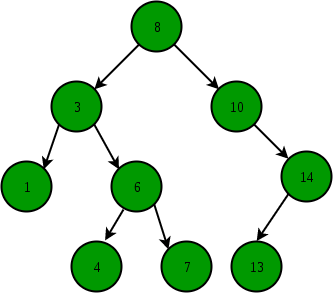
<b>The above properties of Binary Search Tree provides an ordering among keys so that the operations like search, minimum and maximum can be done fast. If there is no ordering, then we may have to compare every key to search for a given key.</b>


## Search operation
1. Start from the root. 
2. Compare the searching element with root, if less than root, then recurse for left, else recurse for right. 
3. If the element to search is found anywhere, return true, else return false.

In [1]:
def search(root,key):
    # Base Cases: root is null or key is present at root
    if root is None or root.val == key:
        return root
    # Key is greater than root's key
    if root.val < key:
        return search(root.right,key)
    # Key is smaller than root's key
    return search(root.left,key)

## Insertion operation

A new key is always inserted at the leaf. We start searching a key from the root until we hit a leaf node. Once a leaf node is found, the new node is added as a child of the leaf node.

         100                               100
        /   \        Insert 40            /    \
      20     500    --------->          20     500 
     /  \                              /  \  
    10   30                           10   30
                                              \   
                                              40
1. Start from the root. 
2. Compare the inserting element with root, if less than root, then recurse for left, else recurse for right. 
3. After reaching the end, just insert that node at left(if less than current) else right. 

<b>Time Complexity:</b> The worst-case time complexity of search and insert operations is O(h) where h is the height of the Binary Search Tree. In the worst case, we may have to travel from root to the deepest leaf node. The height of a skewed tree may become n and the time complexity of search and insert operation may become O(n).

In [2]:
class Node:
    def __init__(self,key):
        self.left = None
        self.right = None
        self.val = key

In [4]:
# A utility function to insert
# a new node with the given key
def insert(root,key):
    if root is None:
        return Node(key)
    else:
        if root.val == key:
            return root
        elif root.val < key:
            root.right = insert(root.right, key)
        else:
            root.left = insert(root.left, key)
    
    return root

def inorder(root):
    if root:
        inorder(root.left)
        print(root.val)
        inorder(root.right)

In [5]:
#     50
#   /     \
#  30     70
#  / \   / \
# 20 40 60 80
r = Node(50)
r = insert(r, 30)
r = insert(r, 20)
r = insert(r, 40)
r = insert(r, 70)
r = insert(r, 60)
r = insert(r, 80)
 
# Print inoder traversal of the BST
inorder(r)

20
30
40
50
60
70
80


<b>1. Inorder traversal of BST always produces sorted output.<br>
2. We can construct a BST with only Preorder or Postorder or Level Order traversal. Note that we can always get inorder traversal by sorting the only given traversal.</b>

## Delete operation
1) Node to be deleted is the leaf: Simply remove from the tree.

             50                            50
           /     \         delete(20)      /   \
          30      70       --------->    30     70 
         /  \    /  \                     \    /  \ 
       20   40  60   80                   40  60   80

2) Node to be deleted has only one child: Copy the child to the node and delete the child

              50                            50
           /     \         delete(30)      /   \
          30      70       --------->    40     70 
            \    /  \                          /  \ 
            40  60   80                       60   80
3) Node to be deleted has two children: Find inorder successor of the node. Copy contents of the inorder successor to the node and delete the inorder successor. Note that inorder predecessor can also be used. 

             50                            60
           /     \         delete(50)      /   \
          40      70       --------->    40    70 
                 /  \                            \ 
                60   80                           80
The important thing to note is, inorder successor is needed only when the right child is not empty. In this particular case, inorder successor can be obtained by finding the minimum value in the right child of the node.

<b>Time Complexity:</b><br> The worst case time complexity of delete operation is O(h) where h is the height of the Binary Search Tree. In worst case, we may have to travel from the root to the deepest leaf node. The height of a skewed tree may become n and the time complexity of delete operation may become O(n)

In [6]:
class Node:
    def __init__(self,key):
        self.key = key
        self.left = None
        self.right = None

In [7]:
def inorder(root):
    if root is not None:
        inorder(root.left)
        print(root.key)
        inorder(root.right)

def insert(node,key):
    # If the tree is empty, return a new node
    if node is None:
        return Node(key)
    
    if key < node.key:
        node.left = insert(node.left,key)
    else:
        node.right = insert(node.right,key)
    
    return node

# Given a non-empty binary
# search tree, return the node
# with minimum key value
# found in that tree. Note that the
# entire tree does not need to be searched
def minValueNode(node):
    current = node    
    # loop down to find the leftmost leaf
    while current.left is not None:
        current = current.left
    
    return current

def deleteNode(root,key):
    # Base Case
    if root is None:
        return root
    # If the key to be deleted
    # is smaller than the root's
    # key then it lies in  left subtree
    if key < root.key:
        root.left = deleteNode(root.left,key)
    # If the kye to be delete
    # is greater than the root's key
    # then it lies in right subtree
    elif key > root.key:
        root.right = deleteNode(root.right,key)
    # If key is same as root's key, then this is the node
    # to be deleted
    else:
        # Node with only one child or no child
        if root.left is None:
            temp = root.right
            root = None
            return temp
        
        elif root.right is None:
            temp = root.left
            root = None
            return temp
        # Node with two children:
        # Get the inorder successor
        # (smallest in the right subtree)
        temp = minValueNode(root.right)
        # Copy the inorder successor's
        # content to this node
        root.key = temp.key
        # Delete the inorder successor
        root.right = deleteNode(root.right,temp.key)
    
    return root

In [10]:
""" Let us create following BST
              50
           /     \
          30      70
         /  \    /  \
       20   40  60   80 """

root = None
root = insert(root, 50)
root = insert(root, 30)
root = insert(root, 20)
root = insert(root, 40)
root = insert(root, 70)
root = insert(root, 60)
root = insert(root, 80)
 
print("Inorder traversal of the given tree")
inorder(root)
 
print("\nDelete 20")
root = deleteNode(root, 20)
print("Inorder traversal of the modified tree")
inorder(root)
 
print("\nDelete 30")
root = deleteNode(root, 30)
print("Inorder traversal of the modified tree")
inorder(root)
 
print("\nDelete 50")
root = deleteNode(root, 50)
print("Inorder traversal of the modified tree")
inorder(root)

Inorder traversal of the given tree
20
30
40
50
60
70
80

Delete 20
Inorder traversal of the modified tree
30
40
50
60
70
80

Delete 30
Inorder traversal of the modified tree
40
50
60
70
80

Delete 50
Inorder traversal of the modified tree
40
60
70
80


### Optimization to above code for two children case : 
In the above recursive code, we recursively call delete() for the successor. We can avoid recursive calls by keeping track of the parent node of the successor so that we can simply remove the successor by making the child of a parent NULL. We know that the successor would always be a leaf node.

In [11]:
class Node:
    def __init__(self,key):
        self.key = key
        self.left = None
        self.right = None

In [12]:
def inorder(root):
    if root is not None:
        inorder(root.left)
        print(root.key, end=" ")
        inorder(root.right)

def insert(node,key):
    if node is None:
        return Node(key)
    if key < node.key:
        node.left = insert(node.left,key)
    else:
        node.right = insert(node.right,key)
    
    return node

def deleteNode(root,key):
    # Base Case
    if root is None:
        return root
    # Recursive calls for ancestors of
    # node to be deleted
    if key < root.key:
        root.left = deleteNode(root.left,key)
        return root
    elif key > root.key:
        root.right = deleteNode(root.right,key)
        return root
    # We reach here when root is the node
    # to be deleted.
    
    # If root node is a leaf node
    if root.left is None and root.right is None:
        return None
    
    # If one of the children is empty
    if root.left is None:
        temp = root.right
        root = None
        return temp
    
    elif root.right is None:
        temp = root.left
        root = None
        return temp
    
    # If both children exist
    succParent = root
    # Find Successor
    succ = root.right
    
    while succ.left != None:
        succParent = succ
        succ = succ.left
    
    # Delete successor.Since successor
    # is always left child of its parent
    # we can safely make successor's right
    # right child as left of its parent.
    # If there is no succ, then assign
    # succ->right to succParent->right
    if succParent != root:
        succParent.left = succ.right
    else:
        succParent.right = succ.right
    
    # Copy Successor Data to root
    root.key = succ.key
    
    return root

In [13]:
""" Let us create following BST
              50
           /     \
          30      70
         /  \    /  \
       20   40  60   80 """
 
root = None
root = insert(root, 50)
root = insert(root, 30)
root = insert(root, 20)
root = insert(root, 40)
root = insert(root, 70)
root = insert(root, 60)
root = insert(root, 80)
 
print("Inorder traversal of the given tree")
inorder(root)
 
print("\nDelete 20")
root = deleteNode(root, 20)
print("Inorder traversal of the modified tree")
inorder(root)
 
print("\nDelete 30")
root = deleteNode(root, 30)
print("Inorder traversal of the modified tree")
inorder(root)
 
print("\nDelete 50")
root = deleteNode(root, 50)
print("Inorder traversal of the modified tree")
inorder(root)

Inorder traversal of the given tree
20 30 40 50 60 70 80 
Delete 20
Inorder traversal of the modified tree
30 40 50 60 70 80 
Delete 30
Inorder traversal of the modified tree
40 50 60 70 80 
Delete 50
Inorder traversal of the modified tree
40 60 70 80 

## Advantages of BST over Hash Table

Hash Table supports following operations in Θ(1) time.
1) Search
2) Insert
3) Delete

The time complexity of above operations in a self-balancing Binary Search Tree (BST) (like Red-Black Tree, AVL Tree, Splay Tree, etc) is O(Logn).

So Hash Table seems to beating BST in all common operations. When should we prefer BST over Hash Tables, what are advantages. Following are some important points in favor of BSTs.

1. We can get all keys in sorted order by just doing Inorder Traversal of BST. This is not a natural operation in Hash Tables and requires extra efforts.
2. Doing order statistics, finding closest lower and greater elements, doing range queries are easy to do with BSTs. Like sorting, these operations are not a natural operation with Hash Tables.
3. BSTs are easy to implement compared to hashing, we can easily implement our own customized BST. To implement Hashing, we generally rely on libraries provided by programming languages.
4. With Self-Balancing BSTs, all operations are guaranteed to work in O(Logn) time. But with Hashing, Θ(1) is average time and some particular operations may be costly, especially when table resizing happens.